In [7]:
! pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

# imports
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot


In [18]:
# model definition:

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),  # 16 x 128 x 128
            nn.ReLU(),
            nn.MaxPool2d(2),  # 16 x 64 x 64

            nn.Conv2d(16, 32, kernel_size=3, padding=1),  # 32 x 64 x 64
            nn.ReLU(),
            nn.MaxPool2d(2),  # 32 x 32 x 32

            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 64 x 32 x 32
            nn.ReLU(),
            nn.MaxPool2d(2),  # 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, padding=1), #128 x 16 x 16
            nn.ReLU(),
            nn.MaxPool2d(2), #128 x 8 x 8
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [19]:
model = CNN()

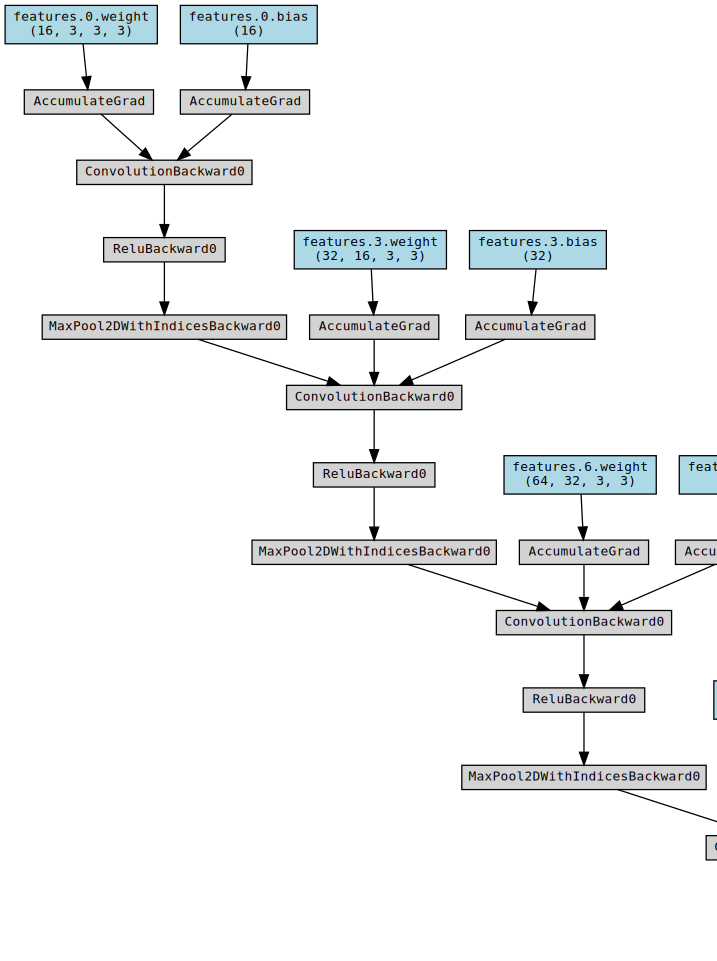

In [22]:

img_size = 128

x = torch.randn((1, 3, img_size, img_size))
y = model(x)

make_dot(y.mean(), params=dict(model.named_parameters()))

In [24]:
make_dot(y.mean(), params=dict(list(model.named_parameters()))).render("Model", format="png")


'Model.png'

Model image saved in google machine